In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.feature_selection import SelectKBest, f_classif
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/DMT/Grouproject/hessi.solar.flare.UP_To_2018.csv")

In [ ]:
df.describe()

,flare,duration.s,peak.c/s,total.counts,x.pos.asec,y.pos.asec,radial,active.region.ar
count,1.161430e+05,116143.000000,116143.000000,1.161430e+05,116143.000000,116143.000000,116143.000000,116143.000000
mean,1.099563e+07,493.643009,215.086617,3.768843e+05,-7.681625,-42.185495,687.896989,990.071550
std,9.888161e+06,434.131763,839.382841,3.048797e+06,755.773503,401.904509,511.364382,1351.853636
min,2.021213e+06,8.000000,0.000000,8.000000e+00,-10012.000000,-10005.000000,0.000000,0.000000
25%,4.112632e+06,212.000000,28.000000,2.284000e+04,-701.000000,-247.000000,467.000000,0.000000
50%,1.112297e+07,364.000000,56.000000,5.856000e+04,0.000000,-71.000000,759.000000,691.000000
75%,1.404222e+07,628.000000,144.000000,1.798080e+05,708.000000,198.000000,946.000000,1564.000000
max,1.711151e+08,4444.000000,113156.000000,4.355501e+08,1190.000000,1223.000000,14154.000000,9999.000000


In [ ]:
df.head()

,flare,start.date,start.time,peak,end,duration.s,peak.c/s,total.counts,energy.kev,x.pos.asec,y.pos.asec,radial,active.region.ar,flag.1,flag.2,flag.3,flag.4,flag.5
0,2021213,2002-02-12,21:29:56,21:33:38,21:41:48,712,136,167304.0,12-25,592,-358,692,0,A1,P1,NaN,NaN,NaN
1,2021228,2002-02-12,21:44:08,21:45:06,21:48:56,288,7,9504.0,6-12,604,-341,694,9811,A1,P1,PE,Q1,NaN
2,2021332,2002-02-13,00:53:24,00:54:54,00:57:00,216,15,11448.0,6-12,-310,375,487,9825,A1,P1,NaN,NaN,NaN
3,2021308,2002-02-13,04:22:52,04:23:50,04:26:56,244,20,17400.0,12-25,-277,378,469,9822,A1,P1,NaN,NaN,NaN
4,2021310,2002-02-13,07:03:52,07:05:14,07:07:48,236,336,313392.0,25-50,-272,390,476,9825,A1,GS,P1,PE,Q2


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116143 entries, 0 to 116142
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   flare             116143 non-null  int64  
 1   start.date        116143 non-null  object 
 2   start.time        116143 non-null  object 
 3   peak              116143 non-null  object 
 4   end               116143 non-null  object 
 5   duration.s        116143 non-null  int64  
 6   peak.c/s          116143 non-null  int64  
 7   total.counts      116143 non-null  float64
 8   energy.kev        116143 non-null  object 
 9   x.pos.asec        116143 non-null  int64  
 10  y.pos.asec        116143 non-null  int64  
 11  radial            116143 non-null  int64  
 12  active.region.ar  116143 non-null  int64  
 13  flag.1            116143 non-null  object 
 14  flag.2            116143 non-null  object 
 15  flag.3            96236 non-null   object 
 16  flag.4            95

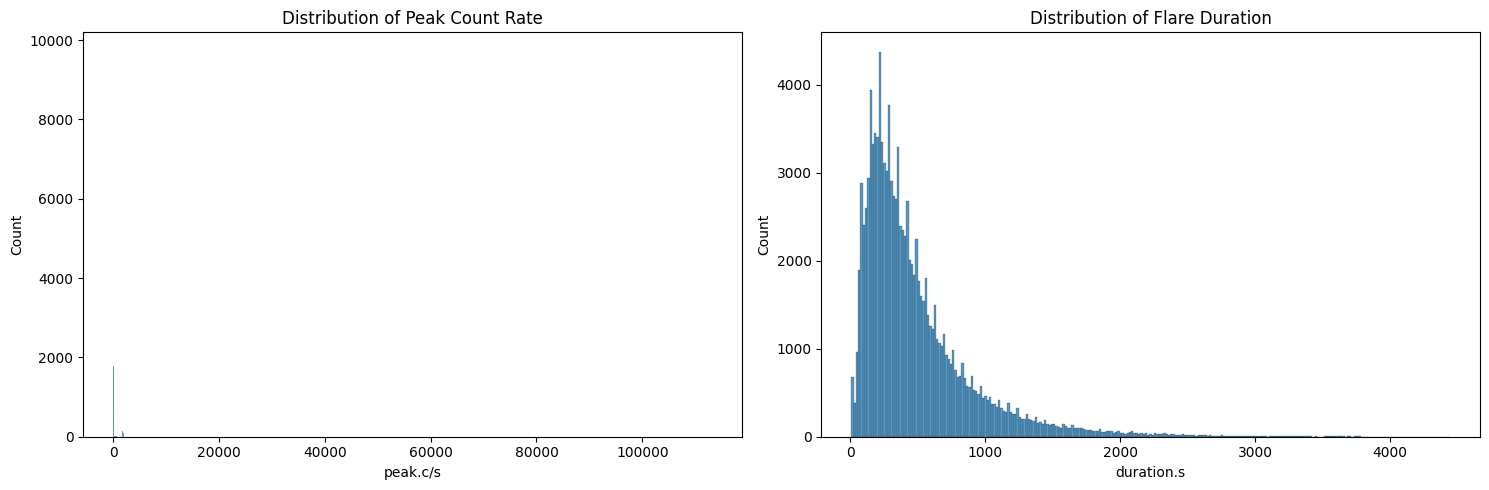

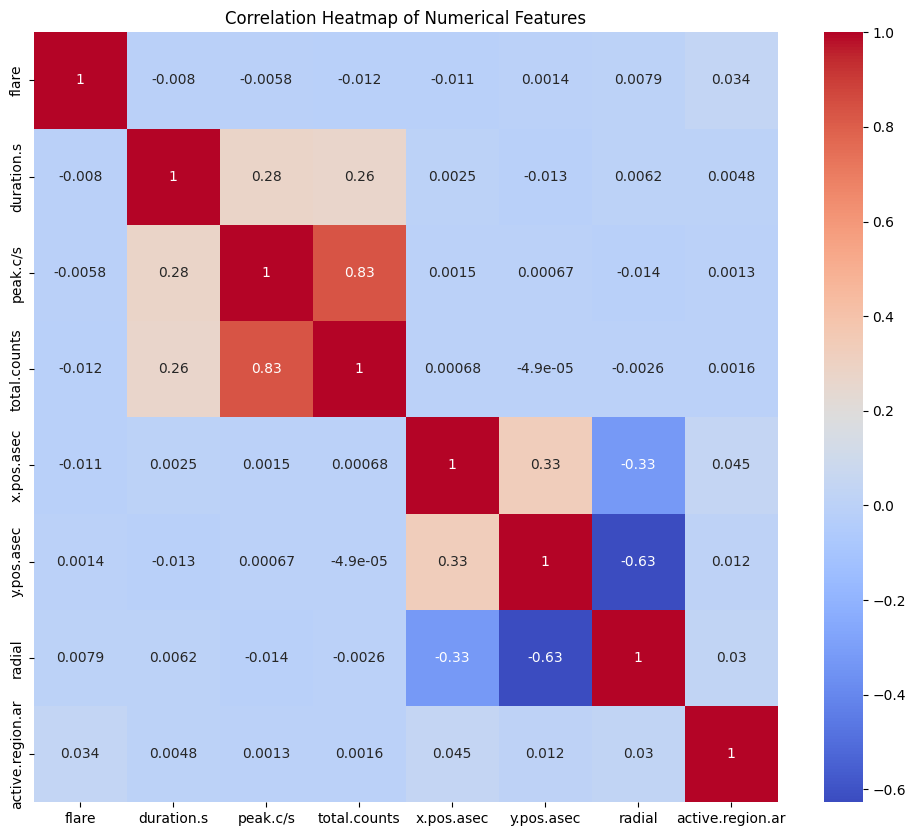

In [ ]:
print(df.info())
print("Summary statistics:\n", df.describe())
print("Number of missing values: ", df.isnull().sum())

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
sns.histplot(df['peak.c/s'], ax=ax1)
ax1.set_title('Distribution of Peak Count Rate')
sns.histplot(df['duration.s'], ax=ax2)
ax2.set_title('Distribution of Flare Duration')
plt.tight_layout()
plt.show()

# Correlation heatmap
numerical_features = df.select_dtypes(include=['float64', 'int64']).columns
correlation_matrix = df[numerical_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Log-transforming peak.c/s
df['log_peak.c/s'] = np.log1p(df['peak.c/s'])
# Convert date and time columns to datetime
df['start_datetime'] = pd.to_datetime(df['start.date'] + ' ' + df['start.time'])


features = ['x.pos.asec', 'y.pos.asec', 'radial', 'active.region.ar']
targets = ['log_peak.c/s', 'duration.s']

# One-hot encode the 'energy.kev' column
energy_encoded = pd.get_dummies(df['energy.kev'], prefix='energy')
df = pd.concat([df, energy_encoded], axis=1)

# Add encoded energy features to the features list
features += list(energy_encoded.columns)

# Prepare the feature matrix X and target vector y
X = df[features]
y = df[targets]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
target_scaler = StandardScaler()
y_train_scaled = target_scaler.fit_transform(y_train)
y_test_scaled = target_scaler.transform(y_test)

print("Shape of X_train_scaled:", X_train_scaled.shape)
print("Shape of y_train:", y_train.shape)

Shape of X_train_scaled: (92914, 13)
Shape of y_train: (92914, 2)


**Model Building**

In [ ]:
import torch
import torch.nn as nn
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
class SolarFlareTransformer(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, num_heads, output_dim):
        super().__init__()
        self.embedding = nn.Linear(input_dim, hidden_dim)
        encoder_layer = nn.TransformerEncoderLayer(
            d_model=hidden_dim,
            nhead=num_heads,
            batch_first=True  # Set batch_first to True
        )
        self.transformer = nn.TransformerEncoder(
            encoder_layer,
            num_layers=num_layers
        )
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        x = self.embedding(x)
        x = x.unsqueeze(1)  # Add sequence dimension (batch_size, 1, hidden_dim)
        x = self.transformer(x)
        x = x.squeeze(1)  # Remove sequence dimension
        return self.fc(x)

input_dim = X_train_scaled.shape[1]
hidden_dim = 64
num_layers = 2
num_heads = 4
output_dim = 2  # 2 prediction tasks of log peak count rate & duration

model = SolarFlareTransformer(input_dim, hidden_dim, num_layers, num_heads, output_dim).to(device)

X_train_tensor = torch.FloatTensor(X_train_scaled).to(device)
y_train_tensor = torch.FloatTensor(y_train.values).to(device)
X_test_tensor = torch.FloatTensor(X_test_scaled).to(device)
y_test_tensor = torch.FloatTensor(y_test.values).to(device)

In [ ]:
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import TensorDataset, DataLoader

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)

criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
for epoch in range(num_epochs):
    model.train()
    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/50], Loss: 280172.0000
Epoch [20/50], Loss: 73537.4375
Epoch [30/50], Loss: 326130.1250
Epoch [40/50], Loss: 130744.0547
Epoch [50/50], Loss: 92688.8672


MSE for peak count rate: 1.4649
MSE for duration: 163230.8281


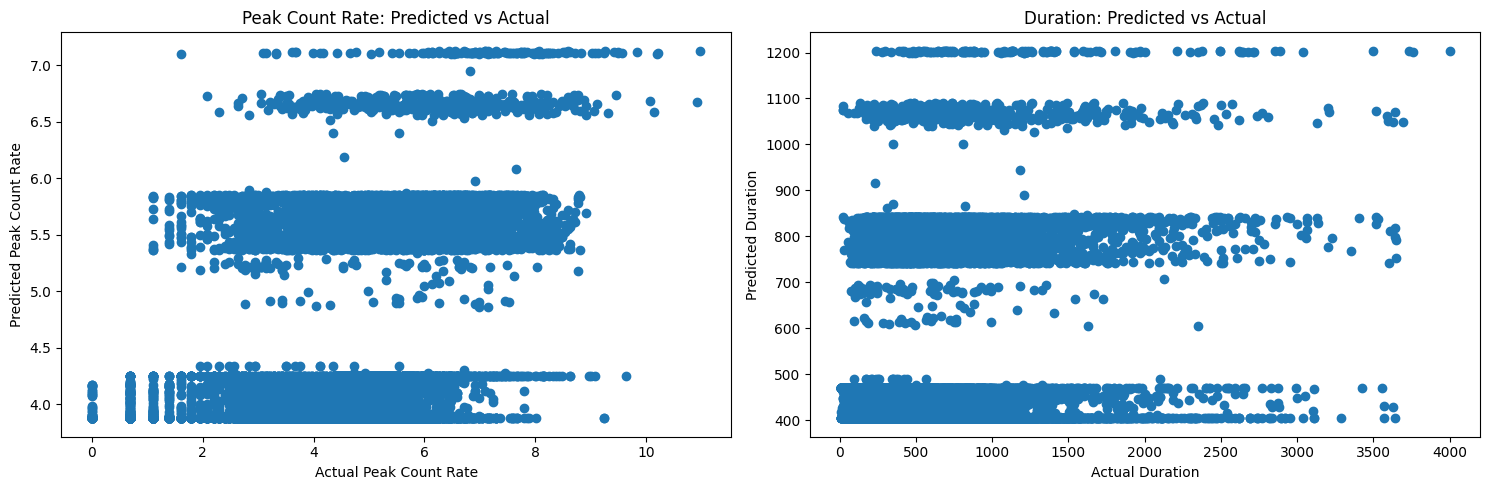

In [ ]:
model.eval().cpu()
X_test_tensor = X_test_tensor.cpu()
y_test_tensor = y_test_tensor.cpu()

with torch.no_grad():
    y_pred = model(X_test_tensor)

y_pred_np = y_pred.numpy()
y_test_np = y_test_tensor.numpy()

mse_peak = np.mean((y_pred_np[:, 0] - y_test_np[:, 0]) ** 2)
mse_duration = np.mean((y_pred_np[:, 1] - y_test_np[:, 1]) ** 2)

y_pred_peak = np.exp(y_pred_np[:, 0]) - 1
y_test_peak = np.exp(y_test_np[:, 0]) - 1

print(f'MSE for peak count rate: {mse_peak:.4f}')
print(f'MSE for duration: {mse_duration:.4f}')

# Plot predicted vs actual values
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
ax1.scatter(y_test_np[:, 0], y_pred_np[:, 0])
ax1.set_xlabel('Actual Peak Count Rate')
ax1.set_ylabel('Predicted Peak Count Rate')
ax1.set_title('Peak Count Rate: Predicted vs Actual')

ax2.scatter(y_test_np[:, 1], y_pred_np[:, 1])
ax2.set_xlabel('Actual Duration')
ax2.set_ylabel('Predicted Duration')
ax2.set_title('Duration: Predicted vs Actual')

plt.tight_layout()
plt.show()

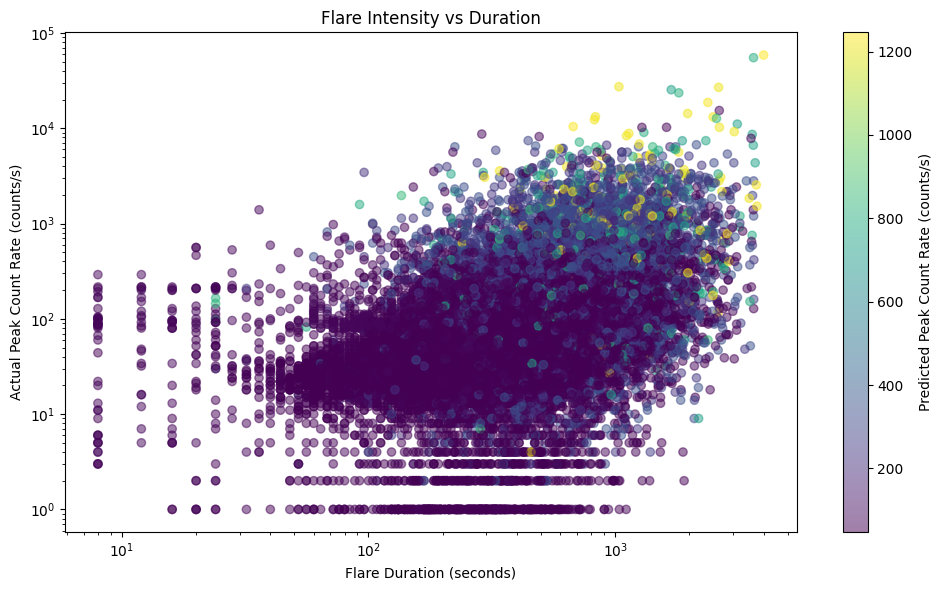

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test_np[:, 1], y_test_peak, alpha=0.5, c=y_pred_peak, cmap='viridis')
plt.colorbar(label='Predicted Peak Count Rate (counts/s)')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('Flare Duration (seconds)')
plt.ylabel('Actual Peak Count Rate (counts/s)')
plt.title('Flare Intensity vs Duration')
plt.tight_layout()
plt.show()

In [ ]:
print(f"Median predicted peak count rate: {np.median(y_pred_peak):.2f} counts/s")
print(f"Median actual peak count rate: {np.median(y_test_peak):.2f} counts/s")
print(f"Median predicted flare duration: {np.median(y_pred_np[:, 1]):.2f} seconds")
print(f"Median actual flare duration: {np.median(y_test_np[:, 1]):.2f} seconds")


Median predicted peak count rate: 47.24 counts/s
Median actual peak count rate: 54.00 counts/s
Median predicted flare duration: 404.46 seconds
Median actual flare duration: 364.00 seconds


In [ ]:
# Calculate flare classes based on peak count rates
def get_flare_class(peak_rate):
    if peak_rate < 10:
        return 'A'
    elif peak_rate < 100:
        return 'B'
    elif peak_rate < 1000:
        return 'C'
    elif peak_rate < 10000:
        return 'M'
    else:
        return 'X'

actual_classes = [get_flare_class(rate) for rate in y_test_peak]
predicted_classes = [get_flare_class(rate) for rate in y_pred_peak]

class_accuracy = sum([a == p for a, p in zip(actual_classes, predicted_classes)]) / len(actual_classes)
print(f"\nFlare classification accuracy: {class_accuracy:.2%}")

# Print distribution of flare classes
from collections import Counter
actual_class_dist = Counter(actual_classes)
predicted_class_dist = Counter(predicted_classes)

print("\nActual flare class distribution:")
for cls, count in actual_class_dist.items():
    print(f"Class {cls}: {count} ({count/len(actual_classes):.2%})")

print("\nPredicted flare class distribution:")
for cls, count in predicted_class_dist.items():
    print(f"Class {cls}: {count} ({count/len(predicted_classes):.2%})")


Flare classification accuracy: 68.33%

Actual flare class distribution:
Class M: 1014 (4.37%)
Class C: 6327 (27.24%)
Class B: 14560 (62.68%)
Class A: 1310 (5.64%)
Class X: 18 (0.08%)

Predicted flare class distribution:
Class C: 4281 (18.43%)
Class B: 18809 (80.97%)
Class M: 139 (0.60%)
